## Skill-Assessment Exercise 13.9

#### PROBLEM

In Example 11.3, a lead compensator was designed for a unity feedback system whose plant was

$$
G(s) = \frac{100K}{s(s+36)(s+100)}
$$

The design specifications were as follows: percent overshoot = 20%, peak time = 0.1 second, and $K_{v}$ = 40. In order to meet the requirements, the design yielded $K$ = 1440 and a lead compensator

$$
G_{c}(s) = 2.38 \frac{s+25.3}{s+60.2}
$$

If the system is to be computer controlled, find the digital controller $G_{c}(z)$.

#### ANSWER

The frequency of the overall system $G(s)$ at 0dB needs to first be found in order to find _Astrom and Wittenmark's_ range of $T$ values for the bilinear transform (Tustin's method). After a $T$ value has been selected, the bilinear transform can then be applied to transform $G_{c}(s)$ to $G_{c}(z)$.

Plot the magnitude of the total system $G(s)$ and find the frequency at which the magnitude is 0dB.

$$
G(s) = \frac{100 \cdot 1440 \cdot 2.38(s+25.3)}{s(s+36)(s+100)(s+60.2)}
$$

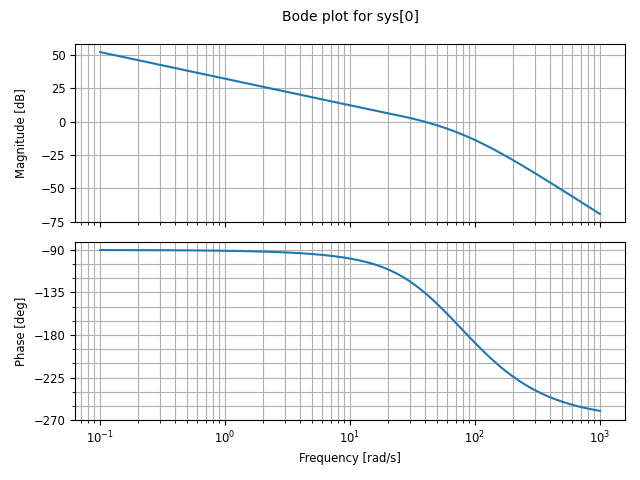

In [1]:
#  Import libraries
import control as ct
# Make plots interactable
%matplotlib ipympl

# Plot magnitude of G(s) to find 0dB frequency
K = 100*1440*2.38
G = ct.zpk([-25.3], [0,-36,-100,-60.2], K)
ct.bode(G, [1e-1, 1e3], dB=True)

The magnitude plot of $G(s)$ reveals that 0dB occurs at 39 rad/s. Thus, $\omega_{\Phi_{M}}$ = 39 rad/s.

The textbook's range for the sampling period $T$ given per _Astrom and Wittenmark_ is

$$
\frac{0.15}{\omega_{\Phi_{M}}} < T < \frac{0.5}{\omega_{\Phi_{M}}}
$$

$$
\frac{0.15}{39} < T < \frac{0.5}{39}
$$

$$
0.004 < T < 0.013
$$

Although $T$ = 0.001 is not within this range, since this is what the textbook's answer uses, this $T$ value will be used in the bilinear transform (Eq 13.88).

$$
s = \frac{2(z-1)}{T(z+1)} = \frac{2(z-1)}{0.001(z+1)}
$$

Substitute this equation for $s$ into $G_c(s)$. This is done in the Python code below.

In [ ]:
#  Import libraries
import sympy as sp

# Convert G_c(s) to G_c(z) using bilinear transform
s, T, z = sp.symbols('s T z')   # Declare symbols
sT = (2*(z-1))/(0.001*(z+1))    # Declare bilinear transform
Gcs = 2.38*((s+25.3)/(s+60.2))  # Declare G_c(s)
Gcz = Gcs.subs(s,sT)            # Substitute bilinear transform into G_c(s) to get G_c(z)
Gczs = sp.simplify(Gcz)         # Simplify G_c(z)
Gczs                            # Print out G_c(z) pretty

(4.820214*z - 4.699786)/(2.0602*z - 1.9398)

The result of the Python code is

$$
G_{c}(z) = \frac{4.820214 z - 4.699786}{2.0602 z - 1.9398}
$$

Simplifying, this results in

$$
G_{c}(z) = \frac{4.820214(z - 0.975016)}{2.0602(z - 0.941559)}
$$

$$
G_{c}(z) = 2.34 \cdot \frac{z - 0.975}{z - 0.9416}
$$


